# AgriMarket

## 농수산물


- Data Source : [농식품 빅데이터 거래소](https://kadx.co.kr/product/detail/94534d90-595d-11eb-acdd-9560621d9652)

- Collection Method : Download

- Data Format : CSV

### 데이터 설명

- 일반농산물 도매 69품목 116품종, 소매 90품목 143품종 및 친환경농산물 38품목 44종 대상 가격 자료

### 컬럼 설명

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

root_path = "../"
data_path = f"{root_path}data"

col_detail={
'prce_reg_ymd' : '가격등록일자',
'mrkt_esnt_no' : '시장고유번호',
'mrkt_code' : '시장코드',
'mrkt_nm' : '시장명',
'ct_code' : '시도코드',
'ctnp_nm' : '시도명',
'sggu_code' : '시군구코드',
'sggu_nm' : '시군구명',
'pdlt_code' : '품목코드',
'pdlt_nm' : '품목명',
'spcs_code' : '품종코드',
'spcs_nm' : '품종명',
'wsrt_exmn_se_code' : '도소매조사구분코드',
'exmn_se_nm' : '조사구분명',
'bulk_grad_code' : '산물등급코드',
'bulk_grad_nm' : '산물등급명',
'pdlt_prce' : '품목가격',
'mtc_smt_unit_mg' : '산지출하단위크기',
'mtc_smt_unit_nm' : '산지출하단위명',
'whsl_smt_unit_mg' : '도매출하단위크기',
'whsl_smt_unit_nm' : '도매출하단위명',
'rtsl_smt_unit_mg' : '소매출하단위크기',
'rtsl_smt_unit_nm' : '소매출하단위명',
'evfd_fmpd_smt_unit_mg' : '친환경농산물출하단위크기',
'evfd_fmpd_smt_unit_nm' : '친환경농산물출하단위명',
'dcnt_prce_yn' : '할인가격여부',
'etl_ldg_dt' : 'ETL적재일시'
}

# 파일 호출, 변수명 및 불러오기 경로는 자신에게 맞게 변경해주시면 됩니다.

In [11]:
import os
files_path = f'{data_path}/TB_TAT_KAMIS_PRC_MK_TB/'
files = os.listdir(files_path)
print(files)

['TB_TAT_KAMIS_PRC_MK_TB-2022.csv', 'TB_TAT_KAMIS_PRC_MK_TB-1996.csv', 'TB_TAT_KAMIS_PRC_MK_TB-1997.csv', 'TB_TAT_KAMIS_PRC_MK_TB-1998.csv', 'TB_TAT_KAMIS_PRC_MK_TB-1999.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2000.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2001.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2002.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2003.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2004.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2005.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2006.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2007.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2008.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2009.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2010.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2011.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2012.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2013.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2014.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2015.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2016.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2017.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2018.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2019.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2020.csv', 'TB_TAT_KAMIS_PRC_MK_TB-2021.csv']


In [12]:
df = pd.DataFrame()
for file in files:
    df_sub = pd.read_csv(f'{files_path}/{file}', encoding='cp949', low_memory=False)
    df_sub = df_sub[['PRCE_REG_YMD', 'CTNP_NM', 'PDLT_NM', 'EXMN_SE_NM', 'BULK_GRAD_NM', 'PDLT_PRCE']]
    df_sub = df_sub[~df_sub['PDLT_NM'].isna()]
    df_sub.columns=['YMD', 'Region', 'Product', 'WR', 'Grade', 'Price']
    df = pd.concat([df, df_sub])

# 1. 년·월·일 에서 연·월 로 변경
# 2. Y(년), M(월) 컬럼 생성

In [13]:
df['YMD'] = df['YMD'].astype(str)
df['YMD'] = df['YMD'].map(lambda x:x[:6])

df['Y'] = df['YMD'].map(lambda x:x[:4]).astype('int16')
df['M'] = df['YMD'].map(lambda x:x[4:]).astype('int8')

In [14]:
# 20년 데이터만 있는 품목 제외

df = df[~df['Product'].isin(['즉석밥', '두부', '김치', '고추장', '된장', '간장', '맛김(조미김)', '콩나물'])]

In [15]:
# Wholesale : 도매
df_w = df[df['WR']=='도매']

In [16]:
# Retail : 소매
df_r = df[df['WR']=='소매']

In [17]:
product_w = df_w['Product'].unique()
product_w = product_w.tolist()

In [18]:
product_r = df_r['Product'].unique()
product_r = product_r.tolist()

# 물가지수 파일과 겹치는 품목 확인

In [21]:
df_1 = pd.read_csv(f'{data_path}/소비자물가지수_품목별_연도별_월별_filtered.csv')

In [34]:
df_1['품목별'].unique()

array(['총지수', '농축수산물', '(농산물)곡물', '쌀', '현미', '찹쌀', '보리쌀', '콩', '땅콩',
       '혼식곡', '(농산물)채소', '배추', '상추', '시금치', '양배추', '미나리', '깻잎', '부추', '무',
       '열무', '당근', '감자', '고구마', '도라지', '콩나물', '버섯', '오이', '풋고추', '호박',
       '가지', '토마토', '파', '양파', '피마늘', '브로콜리', '고사리', '파프리카', '생강',
       '(농산물)과실', '사과', '배', '복숭아', '포도', '밤', '감', '귤', '오렌지', '참외',
       '수박', '딸기', '바나나', '키위'], dtype=object)

In [23]:
# replace로 \u3000 값이 사라지지 않는다.. 이유는 모르겠음
df_1['품목별'] = df_1['품목별'].replace('\u3000', '')

In [24]:
df_1['품목별'] = df_1['품목별'].map(lambda x:x.strip(('\u3000')))

In [25]:
df_1['품목별'].unique()

array(['총지수', '농축수산물', '(농산물)곡물', '쌀', '현미', '찹쌀', '보리쌀', '콩', '땅콩',
       '혼식곡', '(농산물)채소', '배추', '상추', '시금치', '양배추', '미나리', '깻잎', '부추', '무',
       '열무', '당근', '감자', '고구마', '도라지', '콩나물', '버섯', '오이', '풋고추', '호박',
       '가지', '토마토', '파', '양파', '마늘', '브로콜리', '고사리', '파프리카', '생강',
       '(농산물)과실', '사과', '배', '복숭아', '포도', '밤', '감', '귤', '오렌지', '참외',
       '수박', '딸기', '바나나', '키위'], dtype=object)

In [26]:
df['Product'].unique()

array(['감귤', '김', '방울토마토', '포도', '쇠고기', '팥', '쌀', '찹쌀', '콩', '녹두', '고구마',
       '감자', '배추', '양배추', '상추', '오이', '호박', '토마토', '딸기', '무', '당근', '건고추',
       '풋고추', '붉은고추', '깐마늘(국산)', '양파', '파', '생강', '미나리', '깻잎', '피망',
       '파프리카', '멜론', '참깨', '땅콩', '느타리버섯', '팽이버섯', '새송이버섯', '사과', '배',
       '단감', '바나나', '돼지고기', '닭고기', '계란', '명태', '건멸치', '건오징어', '건미역', '굴',
       '수입조기', '호두', '아몬드', '레몬', '건포도', '파인애플', '고춧가루', '새우젓', '멸치액젓',
       '굵은소금', '새우', '얼갈이배추', '수박', '우유', '고등어', '건블루베리', '참다래', '전복',
       '꽁치', '시금치', '열무', '오렌지', '갈치', '물오징어', '망고', '피마늘', '들깨', '북어',
       '갓', '양송이버섯', '표고버섯', '귀리', '보리', '수수', '가지', '부추', '브로콜리', '양상추',
       '기장', '율무', '연근', '우엉', '참외', '아보카도', '블루베리', '체리', '메밀', '복숭아',
       '조기', '절임배추', '깐마늘(수입)', '자몽', '청경채', '케일', '혼합곡'], dtype=object)

In [39]:
df_1.loc[df_1['품목별']=='마늘', ['품목별']] = '피마늘'

In [28]:
Product_list=[]

for i in df['Product'].unique():
    if i in df_1['품목별'].unique():
        Product_list.append(i)

print(Product_list)

['포도', '쌀', '찹쌀', '콩', '고구마', '감자', '배추', '양배추', '상추', '오이', '호박', '토마토', '딸기', '무', '당근', '풋고추', '양파', '파', '생강', '미나리', '깻잎', '파프리카', '땅콩', '사과', '배', '바나나', '수박', '시금치', '열무', '오렌지', '피마늘', '가지', '부추', '브로콜리', '참외', '복숭아']


In [29]:
len(Product_list)

36

# 함수 구현

In [30]:
def Finder(product:str, year:tuple) -> None:

    # input
    # product = input('품목을 입력하세요. : ')
    # start = int(input('시작 연도를 입력하세요. (4자리) : '))
    # end = int(input('끝 연도를 입력하세요. (4자리) : '))
    # print()
    start = year[0]
    end = year[1]
    
    
    if product not in product_w:
        print('해당 제품의 도매 거래내역이 없습니다.')
    
    elif (product in product_w) & (min(df_w[df_w['Product']==product]['Y']) < start) & (max(df_w[df_w['Product']==product]['Y']) > end):
        df_w[(df_w['Product']==product) & (df_w['Y'] >= start) & (df_w['Y'] <= end)].groupby(['YMD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 도매가격 변동 그래프', fontsize=20)
    
    else:
        print('해당 일자에 제품의 도매 거래내역이 없습니다.')

    
    if product not in product_r:
        print('해당 제품의 소매 거래내역이 없습니다.')
    
    elif (product in product_r) & (min(df_r[df_r['Product']==product]['Y']) < start) & (max(df_r[df_r['Product']==product]['Y']) > end):
        df_r[(df_r['Product']==product) & (df_r['Y'] >= start) & (df_r['Y'] <= end)].groupby(['YMD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 소매가격 변동 그래프', fontsize=20)
        
    else:
        print('해당 일자에 제품의 소매 거래내역이 없습니다.')
        

해당 일자에 제품의 소매 거래내역이 없습니다.


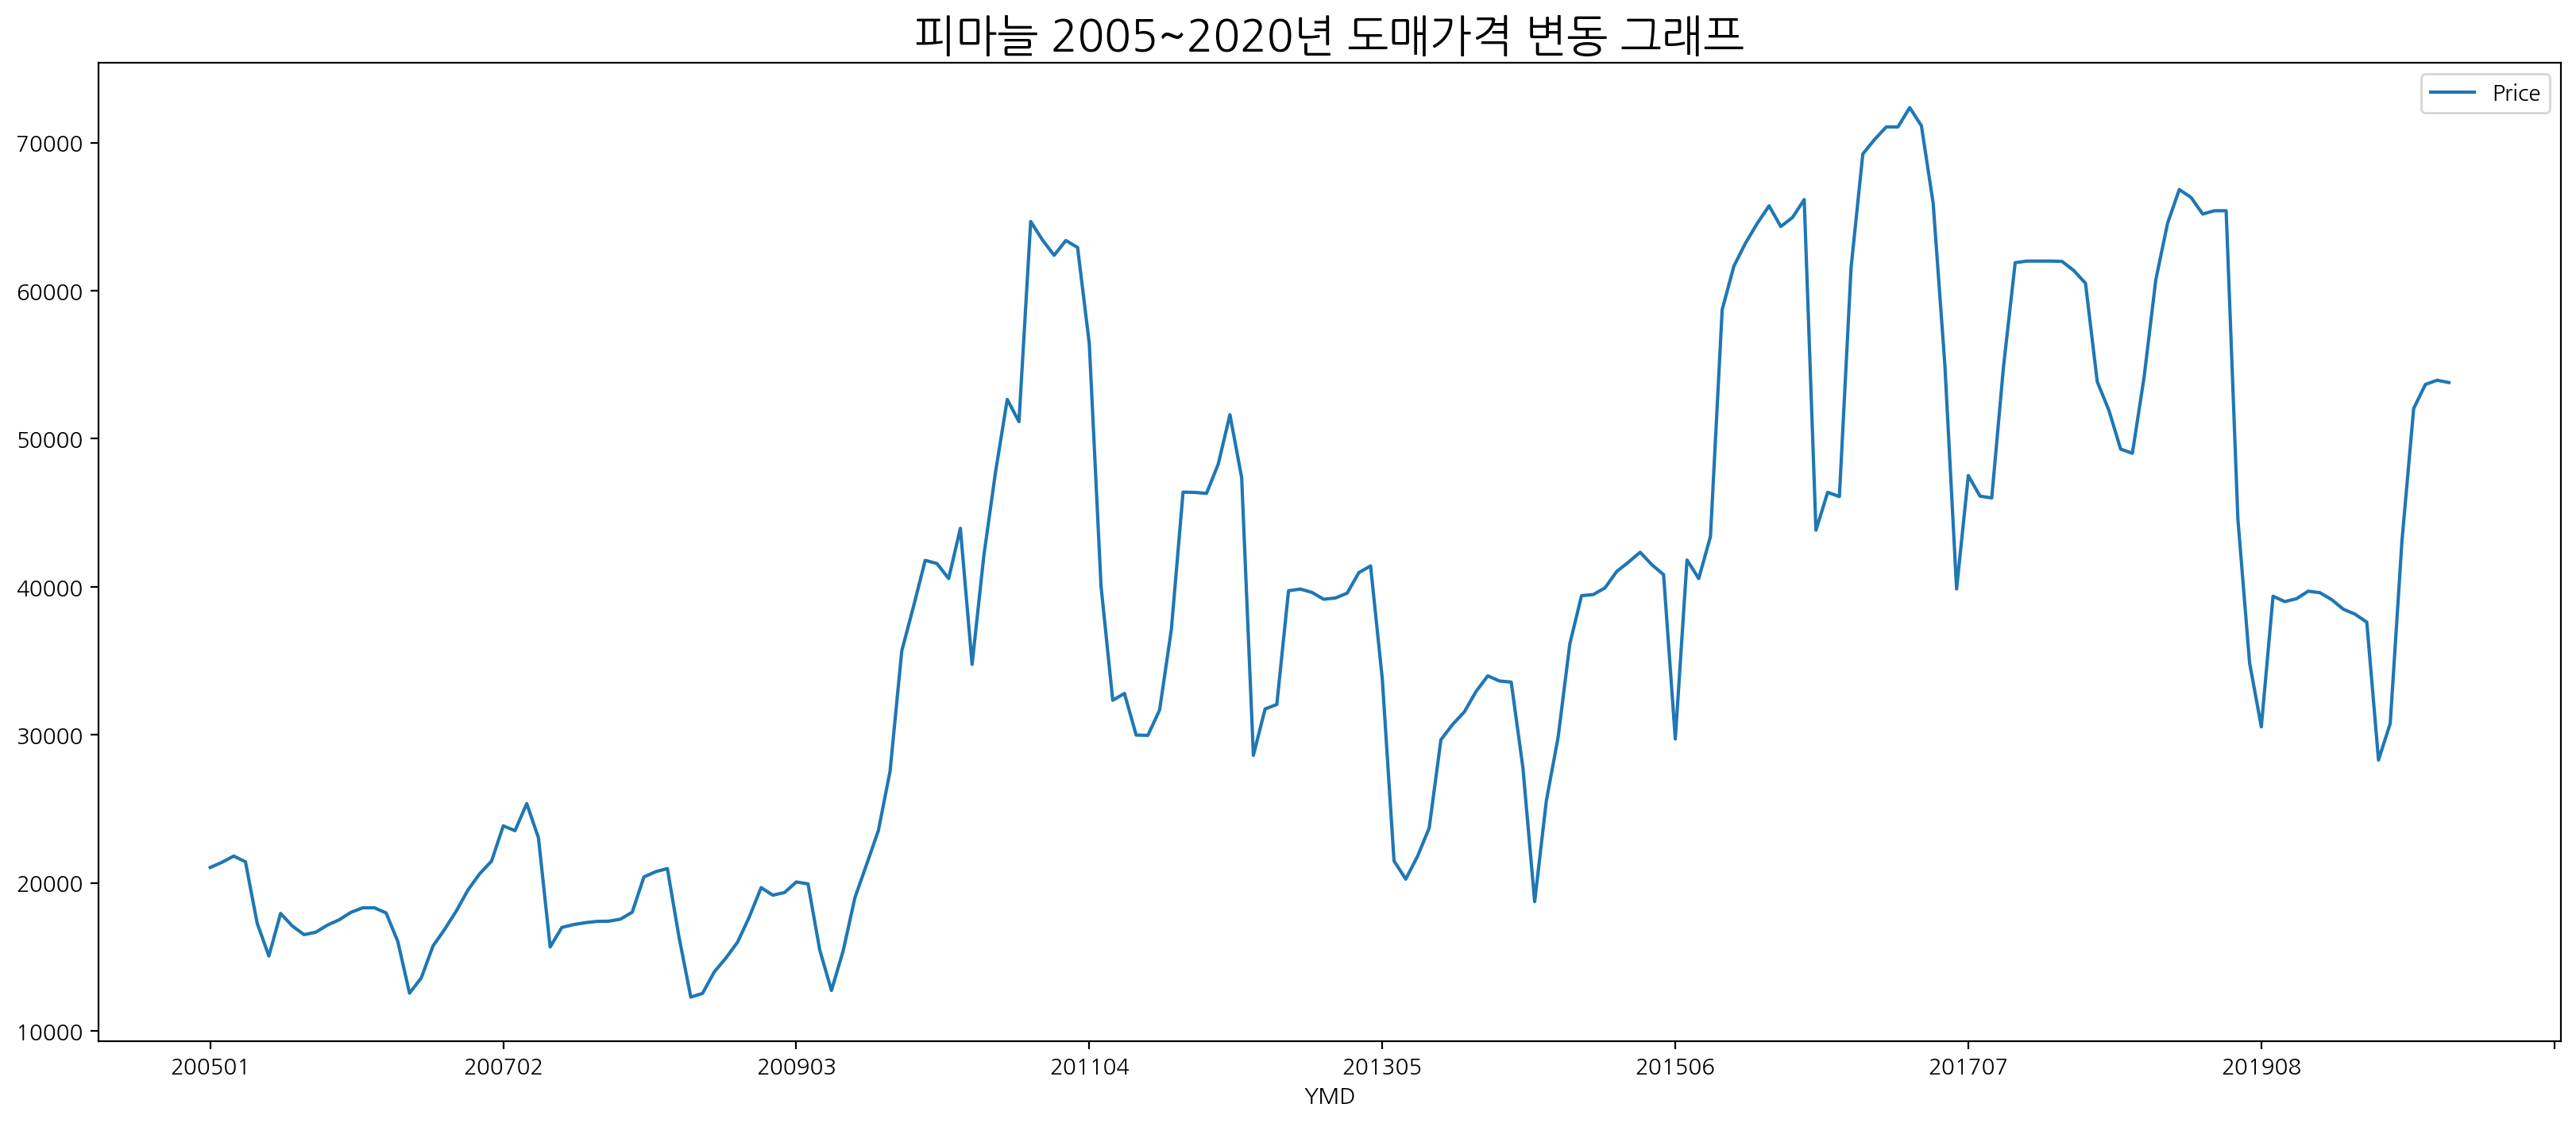

In [33]:
Finder("피마늘", (2005, 2020))